# Qiskit Fall Fest @ Yonsei 2025 : Beginner Hackathon

> Welcome to the Qiskit Fall Fest @ Yonsei 2025 Beginner Hackathon! 🎉  
> This notebook is designed so that even those new to quantum computing and Qiskit can enjoy learning and coding hands-on.  
> Once you complete everything, you'll be automatically entered into the beginner challenge prize draw, so take on the challenge and grab your chance at winning!

**How to Proceed:**

1.  **Learn the Concepts**: Read the explanations for each topic carefully.
2.  **Write Code**: In the cells below each explanation, write code that matches the problem where it says `TODO`.
3.  **Check Your Answer**: After writing your code, run the `Grader Cell` right below to check if your answer is correct.
4.  **Prize Entry**: Once you pass all problems up to the last one, you'll be automatically entered into the prize draw.

### GOOD LUCK 🤞

## Setup

First, run the cell below to install and import the packages needed for this challenge

In [2]:
! pip install 'qiskit[visualization]' qiskit-ibm-runtime qiskit-aer
! pip install requests

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService

import qff25_yonsei_beginner_grader as grader

ERROR: Invalid requirement: "'qiskit[visualization]'"

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Initialize grader

user_name = "2073"
grader.initialize_grader(user_name)

    QISKIT FALL FEST @ YONSEI 2025 Beginner Hackathon에 오신것을 환영합니다!
    지금부터 2073님의 채점 현황이 기록됩니다.


---
## 1. Pauli Operators (Single-Qubit Operators)

Pauli operators (X, Y, Z, I) are 2x2 matrices that represent basic single-qubit quantum operations.

In Qiskit, you can create Pauli operators by sending the desired operator's string as a parameter to the `Pauli` class (e.g., the X operator is `Pauli('X')`).

Pauli operators include X, Y, Z, and I gates. Here's a description of each single-qubit gate:

* ### <h3><span style="color:orange;">Identity Operator (I, Identity)</span></h3>

The **"do nothing"** operation. It keeps any qubit state exactly as it is, no matter what state it's applied to.

$$ I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$

* ### <span style="color:orange;">X Operator (Pauli-X)</span>
The operation most similar to a classical computer's **NOT gate**. It flips the qubit's state to its exact opposite.

* $|0\rangle$ state becomes $|1\rangle$.
* $|1\rangle$ state becomes $|0\rangle$.
* It's like rotating 180 degrees around the **X-axis** of the Bloch Sphere.

$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$

* ### <span style="color:orange;">Z Operator (Pauli-Z)</span>
An operation that **"flips the phase"**. It shows a unique quantum characteristic that doesn't exist in classical computers.

* $|0\rangle$ state remains unchanged.
* It flips the sign (phase) of $|1\rangle$ state to make it $-|1\rangle$.
* It's like rotating 180 degrees around the **Z-axis** of the Bloch Sphere.

$$ Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} $$

* ### <span style="color:orange;">Y Operator (Pauli-Y)</span>
Performs a complex operation that both flips the qubit's state (like the X operation) and changes the phase (like the Z operation) simultaneously.

* It's like rotating 180 degrees around the **Y-axis** of the Bloch Sphere.

$$ Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} $$

---

#### You can also create multi-qubit Pauli operators by assigning characters to each qubit.
Since Qiskit follows **little-endian** bit ordering, `'XI'` means applying `'I'` operation to qubit 0 and `'X'` operation to qubit 1.

#### 💡 Wait: What is Little-Endian?

Little-endian is a way of recording and processing data where the 'little-end' (smallest unit) comes first.
For example, **'254'** in little-endian would be represented as **'452'**.

So for `'XI'`, you read the string from right to left and assign qubit numbers 0, 1, 2... in order.

I (rightmost) → qubit 0

X (next to the left) → qubit 1

Therefore, an operator that applies `'I'` to qubit 0 and `'X'` to qubit 1 can be created as `Pauli('XI')`.

---

### **Problem 1:**
Write code that performs the following:
1. Use `Pauli()` to create a 3-qubit Pauli operator that applies `I` (identity) to qubit 0, `Y` to qubit 1, and `Z` to qubit 2. (According to Qiskit's little-endian ordering, the string should be `'ZYI'`.)
2. Use `to_matrix()` to print the matrix corresponding to the operator.

In [6]:
pauli_op = Pauli('ZYI')
matrix = pauli_op.to_matrix()

print(matrix)

[[0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j]]


In [7]:
# Grader Cell
grader.grade_p1(pauli_op)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
정확한 'ZYI' Pauli 연산자를 생성했습니다.


---

## 2. Single-Qubit Gates and Phase

Single-qubit gates like X, Y, Z, H, S, and T are basic operations applied to a single qubit.
* ### <span style="color:orange;">H Gate (Hadamard Gate)</span>
The Hadamard gate is the most representative gate for creating superposition. It plays an essential role in creating the core characteristic of quantum computing.

On the Bloch sphere, it can be thought of as a rotation that changes states on the Z-axis ($|0\rangle, |1\rangle$) to states on the X-axis ($|+\rangle, |-\rangle$).
* When applied to $|0\rangle$ state:
    $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle$
* When applied to $|1\rangle$ state:
    $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$

Applying the H gate twice in succession returns to the original state. ($H \cdot H = I$)
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$
* ### <span style="color:orange;">S Gate (Phase Gate)</span>
The S gate, also called the phase gate, rotates the phase by **90 degrees (π/2)** around the Z-axis of the Bloch sphere.
* ∣0⟩ state remains unchanged.
* It gives a phase change of $e^{iπ/2}=i$ to the ∣1⟩ state. (∣1⟩→i∣1⟩)
$$S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}$$

* ### <span style="color:orange;">T Gate (π/8 Gate)</span>
The T gate rotates the phase by **45 degrees ($\pi/4$)** around the Z-axis of the Bloch Sphere.
* $|0\rangle$ state remains unchanged.
* It gives a phase change of $e^{i\pi/4}$ to the $|1\rangle$ state. ($|1\rangle \rightarrow e^{i\pi/4}|1\rangle$)
$$T = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

💡 Key relationship: You can think of the T gate as half of the S gate. Applying the T gate twice in succession results in the same operation as the S gate. ($T^2 = S$)

### **Problem 2:**
Write code that performs the following:
1. Create a quantum circuit with one qubit.
2. Set that qubit to the $|1\rangle$ state.
3. Add a T gate to the circuit to apply a phase change of $\pi/4$ to the qubit.

<details>
<summary style="font-size: large; font-weight: bold;">Hint</summary>
You can create a quantum circuit object by sending the number of qubits as a parameter to QuantumCircuit(num_qubits).

When you create a new QuantumCircuit() object, the state of each wire is initialized to $|0\rangle$.

You can use the `'X'` gate to change $|0\rangle$ to $|1\rangle$.
</details>

In [8]:
qc = QuantumCircuit(1)

qc.x(0)
qc.t(0)

statevector = Statevector(qc)
statevector.draw("latex")

<IPython.core.display.Latex object>

In [9]:
# Grader Cell
grader.grade_p2(qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요


---

## 3. Rotational Gates

`RX`, `RY`, `RZ` are Rotational (X,Y,Z) gates, and each gate performs rotation around each axis of the Bloch Sphere.

You can use Rotational Gates to create **superposition** states.

* ### <span style="color:orange;">RX Gate</span>
Rotates by $\theta$ around the X-axis.
$$R_X(\theta) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$

* ### <span style="color:orange;">RY Gate</span>
Rotates by $\theta$ around the Y-axis.

$$R_Y(\theta) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$$

* ### <span style="color:orange;">RZ Gate</span>
Rotates by $\theta$ around the Z-axis.
$$R_Z(\theta) = \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix}$$

For example, if you apply `RY(θ)` to the initial state $|0\rangle$, rotating by $\theta$ angle around the Y-axis creates a superposition state like $\cos(\frac{\theta}{2})|0\rangle + \sin(\frac{\theta}{2})|1\rangle$.

In this case, the probability of measuring 0 or 1 is the square of each amplitude, namely $|\cos(\frac{\theta}{2})|^2$ and $|\sin(\frac{\theta}{2})|^2$.

### **Problem 3:**
Write code that performs the following:
1. Create a quantum circuit with one qubit.
2. Apply a single gate to qubit 0, which has an initial state of $|0\rangle$, to create a superposition state where the probability of measuring $|0\rangle$ is 25% and the probability of measuring $|1\rangle$ is 75%.

<details>
<summary style="font-size: large; font-weight: bold;">Hint</summary>

Use `RY`.

When using a Rotational Gate, pass the angle you want to rotate as the first argument, and the qubit you want to apply the gate to as the second argument.

</details>

Probabilities: {np.str_('0'): np.float64(0.2500000000000001), np.str_('1'): np.float64(0.7499999999999999)}


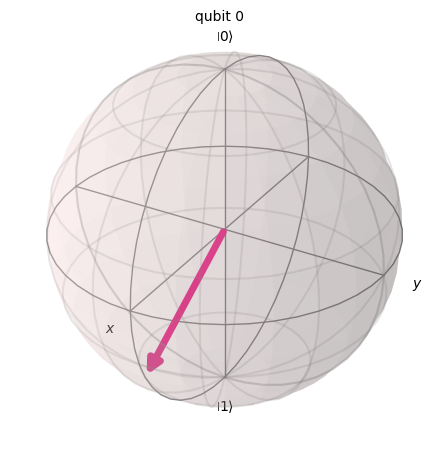

In [10]:
qc = QuantumCircuit(1)
qc.ry(2*np.pi/3, 0)

# TODO

sv = Statevector(qc)
probs = sv.probabilities_dict()
print(f'Probabilities: {probs}')
plot_bloch_multivector(sv)

In [11]:
# Grader Cell
grader.grade_p3(qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
올바른 확률 분포를 만들었습니다.


---

## 4. Multi-Qubit Operations and Entanglement

Multi-qubit gates like CNOT(`qc.cx(control, target)`) create **entanglement** states when applied to qubits in superposition.

The most representative entangled state, the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, can be created by applying an `H` gate to one qubit and then applying a CNOT gate.

Remember that according to Qiskit's little-endian bit ordering, qubit 0 corresponds to the rightmost bit.

### **Problem 4:**
Write code that performs the following:
1. Create a quantum circuit with two qubits.
2. Create the Bell state $|\Phi^+\rangle$ using the first qubit (q0) as the control qubit.
3. Visualize and draw the created quantum circuit using `matplotlib`.
4. Print the final statevector of the circuit.

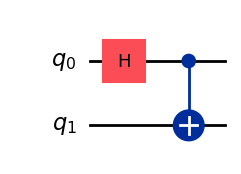

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# TODO

display(qc.draw('mpl'))
statevector = Statevector(qc)
print(statevector)

In [13]:
# Grader Cell
grader.grade_p4(qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
정확한 벨 상태를 만들었습니다.


---

## 5. Building Quantum Circuits and Drawing

The `QuantumCircuit` class is used to build quantum circuits. The `.draw()` method provides visualization functionality, and you can specify various output formats with `output='text', 'mpl', 'latex'`.

You can also adjust the visualization results as desired, such as flipping the order of qubits with `reverse_bits=True`.

You can specify the number of qubits and classical bits in the circuit with `QuantumCircuit(num_qubit, num_classical)`.

### **Problem 5:**
Write code that performs the following:
1. Create a 3-qubit GHZ State.
2. Draw the circuit with `mpl` with the qubit order reversed (so q2 is at the top and q0 is at the bottom).


<details>
<summary style="font-size: large; font-weight: bold;">Hint</summary>

<span style="font-size: large; font-weight:bold; color:orange;">GHZ State</span>

The GHZ state is the most representative quantum state where three or more qubits are entangled.

Below is a 3-qubit GHZ state.
$$|GHZ\rangle=\frac{1}{\sqrt{2}}(|000\rangle+|111\rangle)$$
The GHZ State can be created as follows:

1. Apply `H` to the first qubit to create a superposition state.

2. Using the first qubit as control, sequentially apply `CNOT` to the remaining qubits.

</details>

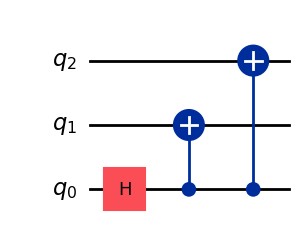

In [16]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

display(qc.draw('mpl', reverse_bits = True))

# TODO

In [17]:
# Grader Cell
grader.grade_p5(qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
정확한 GHZ 상태를 생성했습니다.


---

## 6. Dynamic Circuits and Classical Control Flow

Qiskit supports **dynamic circuits**, which are circuits that can conditionally execute the next operation based on classical measurement results.

You can use the `.if_test()` context manager to create conditional blocks that execute specific operations based on the value of a classical bit.

This enables powerful **classical feed-forward** within quantum programs.

### **Problem 6:**
Write code that performs the following:
1. Create a quantum circuit with two qubits and one classical bit.
2. Add a Hadamard gate to the lowest qubit (qubit 0).
3. Measure qubit 0 and store the result in classical bit 0.
4. Only if the measurement result of qubit 0 is `1`, apply an X gate to qubit 1. Use the `.if_test()` context manager for this conditional operation.
5. Draw the completed circuit using `mpl`.

<details>
<summary style="font-size: large; font-weight: bold;">Hint</summary>

<span style="font-size: large; font-weight:bold; color:orange;">Measurement</span>

You can measure a quantum state using the `qc.measure()` method.

Through `measure(q1, c1)`, you can specify which wire of the quantum circuit to measure and in which classical bit to store the result.

`measure(q1, c1)` means to measure qubit q1 and store it in classical bit c1.

</details>

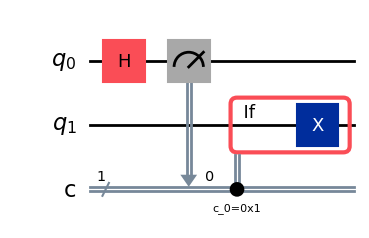

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{H}} & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\qw & \\qw & \\multigate{1}{\\mathrm{If_else}}_<<<{0} & \\qw & \\qw\\\\\n\t \t\\nghost{{c} :  } & \\lstick{{c} :  } & \\cw & \\cw \\ar @{<=} [-2,0] & \\cghost{\\mathrm{If_else}}_<<<{0} & \\cw & \\cw\\\\\n\\\\ }}\n\\end{document}'

In [ ]:
qc = QuantumCircuit(2, 1)
qc.h(0)
qc.measure(0, 0)

with qc.if_test((qc.clbits[0], 1)):
    qc.x(1)


display(qc.draw('mpl'))

# TOCO

In [26]:
# Grader Cell
grader.grade_p6(qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
모든 요구사항을 완벽하게 만족하는 동적 회로입니다.


---

## 7. Visualizing Quantum States and Results

Qiskit provides several functions for visualizing results. `plot_histogram(counts)` is used to display measurement results from simulations or actual devices.

For example, you can sort by frequency of results to make analysis easier.


### **Problem 7:**
Write code that performs the following:
1. Create a quantum circuit with 2 qubits and 2 classical bits that creates the $|\Phi^+\rangle$ Bell state.
2. Store the measurement results of qubits 0 and 1 in classical bits 0 and 1 respectively.
3. Use `AerSimulator` to execute the circuit.
4. Obtain the measurement results (counts).
5. Draw the measurement results as a histogram.

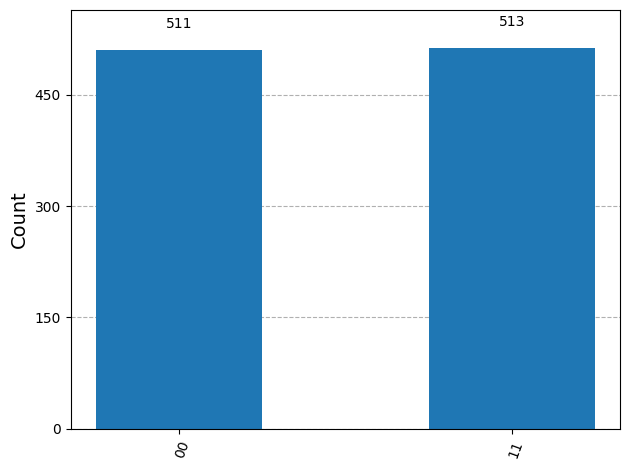

In [30]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)
bell.measure(0, 0)
bell.measure(1, 1)


backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()
display(plot_histogram(counts))

In [31]:
# Grader Cell
grader.grade_p7(counts)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
벨 상태의 올바른 측정 결과 히스토그램입니다.


---

## 8. Parameterized Quantum Circuits

In Qiskit, you can create circuits with symbolic parameters using the `Parameter` class.

These parameters can later be assigned (bound) to specific numerical values through the `.assign_parameters()` method, acting as a kind of placeholder.

This functionality is core to variational algorithms like VQE and QAOA.

### **Problem 8:**
Write code that performs the following:
1. Create a `Parameter` instance representing a parameter named `theta`.
2. Create a quantum circuit called `qc` with one qubit.
3. Add an RX gate to that qubit using the `theta` parameter.
4. Use `assign_parameters()` to bind the `theta` parameter to the value `π/2`, creating a new circuit called `bound_qc`.

<details>
<summary style="font-size: large; font-weight: bold;">Hint</summary>

<span style="font-size: large; font-weight:bold; color:orange;">Assigning Values to Parameters</span>

When assigning values with the `assign_parameters()` method, you must pass the arguments in `dict` format as `{Parameter name : value}`.   

</details>

Original Unbound Circuit:


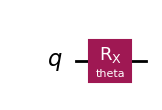

New Bound Circuit:


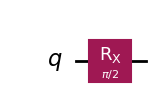

In [92]:
theta = Parameter('theta')
qc = QuantumCircuit(1)
qc.rx(theta, 0)
# TODO

print("Original Unbound Circuit:")
display(qc.draw('mpl'))

bound_qc = qc.assign_parameters({theta: np.pi/2})

print('New Bound Circuit:')
bound_qc.draw('mpl')

In [93]:
# Grader Cell
grader.grade_p8(qc, bound_qc)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요


---

## 9. Circuit Transpilation and Optimization

**Transpilation** is the process of converting a quantum circuit to match the constraints of a specific quantum device, namely the **basis gates set** and **qubit connectivity**.

It plays a role similar to a compiler in classical computers.

You can easily transpile circuits to match a backend using `generate_preset_pass_manager()`.

The `generate_preset_pass_manager()` function creates a transpiling pass manager with preset configurations.

This function has several `optimization_level` settings (0-3), and higher levels take longer to compile but apply more advanced optimization techniques to reduce circuit depth and gate count.

* ### <span style="color:orange;">How to Use PassManager</span>
1. Use `generate_pass_manager()` to create a `PassManager` object. Pass the desired backend with `backend=` and specify the optimization level with `optimization_level=`.
2. Pass the circuit you want to run to the `pm.run()` method, and the transpiled circuit will be executed on the backend.

#### Reference: Description of `generate_preset_pass_manager()` `optimization_level` stages
* level=0 (minimal): Performs almost no optimization. Simply converts gates to basis gates and maps qubits. Fastest compilation speed.

* level=1 (light): Performs light optimization. Includes simple optimization passes such as removing unnecessary gates. (default)

* level=2 (heavy): Performs more aggressive optimization. Uses more complex strategies such as rearranging gates and finding better qubit mappings. Takes longer to compile.

* level=3 (maximum): Performs the strongest possible optimization. Tries various strategies to find the best circuit, which can take a very long time to compile. Used when reducing every single gate is very important, like for final circuits to run on noisy real hardware.

### **Problem 9:**
Write code that performs the following:
1. Create a 3-qubit GHZ circuit.
2. Transpile the circuit for the `FakeVigoV2` backend with `optimization_level=3`.
3. Print the depth of the original circuit.
4. Print the depth of the transpiled circuit.

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
# TODO

backend = FakeVigoV2()
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)

qc_isa = pm.run(qc)

print(f'Original circuit depth: {qc.depth()}')
print(f'Transpiled circuit depth: {qc_isa.depth()}')

Original circuit depth: 3
Transpiled circuit depth: 5


In [43]:
# Grader Cell
grader.grade_p9(qc_isa)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
GHZ 회로를 만들고 성공적으로 트랜스파일링했습니다.
Transpile된 회로의 깊이가 원본 회로보다 더 깊은 것을 확인할 수 있습니다.


---

## 10. Qiskit Runtime Execution Modes

**Description:** Qiskit Runtime provides three execution modes: **job**, **session**, and **batch**.

The execution mode determines how jobs are scheduled, and choosing the right execution mode allows you to run workloads efficiently within budget.

#### There is no problem for this topic 😃

---

## 11. Quantum Primitives (Sampler and Estimator)

Quantum Primitives are standardized interfaces for interacting with quantum computers (or simulators). The main Primitives are `Sampler` and `Estimator`.

##### `Sampler`: Probability Distribution Generator

`Sampler` answers the question: "When I run this quantum circuit, what will be the probability distribution of the final measurement results?"

It runs a quantum circuit and returns the counts or probabilities of each measurement result (bitstring).

It's similar to a statistical surveyor who rolls multiple dice and counts how many times each number appears.

##### `Estimator`: Expectation Value Calculator

`Estimator` answers the question: "For the quantum state created by this quantum circuit, what is the expectation value of a specific Observable?"

It receives a quantum circuit and an Observable to measure, then calculates and returns the expectation value of that physical quantity.

Therefore, `Estimator` needs not only the quantum circuit but also an Observable.

You can execute by passing a transpiled circuit to `Sampler.run()` or `Estimator.run()`.

#### There is no problem for this topic 😃

#### Take another look at how Primitives are used in the previous problem's answer!

---

## 12. Using the Sampler Primitive

In Qiskit 2, you can use the `Sampler` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`.

How to use `Sampler`:

1. Initialize Sampler with `Sampler(mode=backend)`.
2. Run the Sampler Primitive with `sampler.run([qc], shots=...)`. The circuit passed must be transpiled to match the backend and must be passed in a `list`.
3. From the result object obtained through `job.result()`, you can access data via `result[0].data."classical_register_name"`.

### **Problem 12:**
Write code that performs the following:
1. Create a quantum circuit that creates the $|\Phi^+\rangle$ Bell state.
2. Use the `measure_all` method to measure the results.
3. Transpile the circuit using the `AerSimulator` backend. (Set `optimization_level=1`)
4. Initialize `Sampler`.
5. Run Sampler. (Set `shots = 500`)

In [65]:
bell_qc = QuantumCircuit(2, 2)
bell_qc.h(0)
bell_qc.cx(0, 1)
bell_qc.measure_all()


backend = AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=1)
sampler = Sampler(mode=backend)
isa_bell = pm.run(bell_qc)

# TODO
job = sampler.run([bell_qc], shots=500)

result = job.result()
counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')

Measurement counts: {'11': 250, '00': 250}


In [66]:
# Grader Cell
grader.grade_p12(counts)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요


---

## 13. Using the Estimator Primitive

In Qiskit 2, you can use the `Estimator` primitive from `qiskit_ibm_runtime` with local simulators like `AerSimulator`.

How to use `Estimator`:

1. Initialize Estimator with `Estimator(mode=backend)`.
2. Change the observable to the layout of the transpiled circuit (`isa_qc`) with `apply_layout(isa_qc.layout)`.
3. Run the `Estimator` using the `estimator.run([(circuit, observable)])` method. 

    The circuit and observable circuit passed must be transpiled to match the backend, bundled as a tuple in the form `(isa_qc, isa_observable)`, and this tuple must be passed in a `list`.

4. From the result object obtained with `job.result()`, the expectation value is in the `data.evs` attribute of the first object `result[0]`.

### **Problem 13:**
Write code that performs the following:
1. Create a quantum circuit containing the $|\Phi^+\rangle$ Bell state.
2. Define the Observable as `SparsePauliOp('ZZ')`.
3. Transpile the Bell State circuit for the `AerSimulator` backend.
4. Apply the transpiled Bell State circuit layout to the Observable circuit.
5. Initialize the `Estimator` primitive.
6. Run the `Estimator`.
7. Get the expectation value from the `job.result()` object.

In [79]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
pauli = SparsePauliOp('ZZ')

backend = AerSimulator()
estimator = Estimator(mode=backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)
job = estimator.run([(isa_bell, pauli)])




exp_val = job.result()[0].data.evs
print(f"Expectation value for ZZ: {exp_val}")

Expectation value for ZZ: 1.0


In [80]:
# Grader Cell
grader.grade_p13(exp_val)

🎉축하합니다! 정답입니다! 다음 문제로 넘어가세요
정확한 기대값을 계산했습니다.


---

## 14. Error Mitigation Techniques

Qiskit provides several techniques to reduce the impact of noise on quantum hardware.

* **Readout Error Mitigation**: Corrects errors in the final measurement stage, such as incorrectly reading `0` as `1`.
* **Dynamical Decoupling(DD)**: Protects qubits from decoherence by inserting pulse sequences when qubits are idle.
* **Zero-Noise Extrapolation(ZNE)**: A technique that intentionally amplifies noise to various levels, runs the circuit, then extrapolates the results to the zero-noise point to predict the ideal result.

#### There is no problem for this topic 😃

---

## 15. Running on Real IBM Quantum Hardware

In previous problems, we used the `Sampler` primitive from `qiskit_ibm_runtime` with the local simulator `AerSimulator`.

This time, let's run the `Sampler` primitive on a real IBM quantum computer.

### **Problem 15:**

To access IBM Cloud and use real IBM quantum computers, you need to create an IBM Cloud account and get an API key.

1. Go to https://quantum.cloud.ibm.com and create an IBM account.

2. In the IBM Quantum Platform, create an API key by clicking "create" in the API key window on the left side of the screen.

3. Copy the generated API key and paste it into `your_api_key` in the code below.

4. Click Create Instance to create an instance. Select the Open Plan when creating it.

5. After creating the Instance, copy the CRN and paste it into `your_crn`.

In [82]:
your_api_key = "EnterYourAPIHere"
your_crn = "EnterYourCRNHere"

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token="rYQEiSqNTywCTlDhavJZmwKCTtILh0cGXXcmUCKvXial",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/61646611da77493991cc1c14cf494f3b:7884cb23-af4d-4e2e-a7da-35814068d79e::",
    name="qff25-ys",
    overwrite=True,
)

# Check that the account has been saved properly
service = QiskitRuntimeService(name="qff25-ys")
print(service.saved_accounts())

{'qff25-ys': {'channel': 'ibm_quantum_platform', 'url': 'https://cloud.ibm.com', 'token': 'rYQEiSqNTywCTlDhavJZmwKCTtILh0cGXXcmUCKvXial', 'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/61646611da77493991cc1c14cf494f3b:7884cb23-af4d-4e2e-a7da-35814068d79e::', 'verify': True, 'private_endpoint': False}}


##### We will verify the statistics of sampling the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ 5000 times on a real IBM quantum computer.

Run the cell below to check the results.

You can check the status of your currently running Job by going to workload in IBM Quantum Platform.

In [83]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

service = QiskitRuntimeService(name="qff25-ys")
backend = service.least_busy(operational=True, simulator=False)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f"Measurement counts: {counts}")
plot_histogram(counts)

KeyboardInterrupt: 

In [84]:
# Grader Cell
grader.grade_p15(job)

Job ID: d42r8chag40c73847qa0
Job Status: QUEUED
⏳ 작업이 아직 완료되지 않았습니다. 잠시 후 다시 이 셀을 실행하여 상태를 확인하세요.


### Result Analysis:

The Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ should theoretically give half $|00\rangle$ and half $|11\rangle$.

However, on real quantum computers, due to various errors and noise, unlike theory, $|01\rangle$ and $|10\rangle$ also appear, and $|00\rangle$ and $|11\rangle$ are not exactly 1:1.

As you can see, current NISQ hardware is not perfect and quantum computers still have a long way to go.😢


---

## 16. Quantum Key Distribution (BB84)

Key Distribution refers to the process by which a sender and receiver securely share a secret key to be used for encrypted communication.
<br>
* ### <span style="color:orange;">Scenario Setup</span>
👩 Alice: The person sending the message (Sender).

👨 Bob: The person receiving the message (Receiver).

🕵️‍♀️ Eve: The eavesdropper secretly listening to Alice and Bob's communication (Eavesdropper).

Alice and Bob want to have a secret conversation, so they decide to encrypt their conversation. To do that, they need a 'secret key' that only the two of them have.

However, the moment Alice sends the message "Bob, let's use 'rabbit' as our secret key!", the eavesdropper Eve, who is listening in, also learns the secret key 'rabbit'. 

The encryption becomes useless. How can they safely share a secret key through an insecure channel? This is the key distribution problem.
* ### <span style="color:orange;">Symmetric and Asymmetric Keys</span>
There are two main types of these 'secret keys'.
1. Symmetric Key

A symmetric key is a method where the key used for encryption and the key used for decryption are the same.

Encryption and decryption speeds are very fast, making it efficient for encrypting large amounts of data, but if Eve secretly copies the key during the transmission process, Eve can also decrypt the secret conversation.

So when using symmetric keys, the problem of how to safely transmit the secret key initially remains.

2. Asymmetric Key

Asymmetric keys emerged to solve the key distribution problem of symmetric keys.

As the name suggests, the encryption key and decryption key are different. These two keys form a mathematical pair and are called the 'public key' and 'private key' respectively.

- Public Key: Can be made public to everyone. This key can only encrypt (lock).
- Private Key: Must be kept secret by yourself alone. Only this key can decrypt.

To explain simply, think of a mailbox with only a slot for depositing letters.
1. Bob creates a special mailbox that only he can open and places it in the town square. This mailbox is Bob's public key.
2. Alice puts the letter she wants to send to Bob into the slot of this mailbox. (Encrypt with public key)
3. Eve and everyone in town can put letters into this mailbox, but no one can take out the letters inside.
4. Only Bob, the owner of the mailbox, can open the mailbox with his private key and read the letters.
* ### <span style="color:orange;">No Cloning Theorem</span>
According to the No Cloning Theorem, it's impossible to perfectly copy an arbitrary unknown quantum state to create a new identical state.

Classical bits (0 and 1) can be easily copied, but qubits containing superposition and entanglement cannot.

This is because the act of finding out all information about a qubit is itself a kind of 'measurement', and in this process, the state of the original qubit is necessarily changed or destroyed.

Therefore, if key distribution is done using this quantum mechanical property, if the secret key is eavesdropped on, Alice and Bob can definitely know that the key has been eavesdropped on.
* ### <span style="color:orange;">BB84</span>
BB84 is the most representative QKD protocol.

BB84 uses two different bases as methods for encoding and measuring information.
- Rectangular Basis (Z): Represents 0 as $|0\rangle$, 1 as $|1\rangle$.
- Diagonal Basis (X): Represents 0 as $|+\rangle$, 1 as $|-\rangle$.

Here, $|+\rangle$ and $|-\rangle$ in the diagonal basis mean the Bell States $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ and $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$.

Conversely, $|0\rangle$ and $|1\rangle$ can be represented as $|0\rangle = \frac{1}{\sqrt{2}}(|+\rangle + |-\rangle)$ and $|1\rangle = \frac{1}{\sqrt{2}}(|+\rangle - |-\rangle)$.

Therefore, if you measure $|+\rangle$ with the rectangular basis, 0 or 1 appears with 50:50 probability, and if you measure $|0\rangle$ with the diagonal basis, 0 or 1 appears with 50:50 probability.

BB84 is a protocol that uses precisely this point that measurement results appear probabilistically when measured with different bases.

##### The steps of the BB84 protocol are as follows:
1. Alice's encoding and transmission: Alice decides on the secret key she wants to send, randomly selects either the rectangular basis or diagonal basis for each bit, encodes qubits, and sends them to Bob.

For example, if the secret key is `01101` and Alice's randomly chosen bases are (+, +, +, x, x), she will send the quantum state $|011+-\rangle$ to Bob.

2. Bob's measurement: Bob, not knowing which bases Alice randomly chose, randomly selects either the rectangular basis or diagonal basis each time he receives a qubit, measures it, and records the result.

For example, if Bob decides to measure the quantum state sent by Alice with (+, x, x, x, x) bases, the 1st, 4th, and 5th qubits where Bob chose the same basis as Alice will 

measure 0, 0, 1 (what Alice originally intended to send) with 100% probability, and the 2nd and 3rd qubits where he chose different bases from Alice will measure 0 or 1 with 50:50 probability.

3. Basis comparison: Now Alice and Bob compare only their list of bases used for each qubit through a public channel (phone, etc.). (At this time, they never disclose the measured values)
    - Results where they used different bases are meaningless, so they discard them.
    - They keep only results where they used the same bases. These remaining bits become **secret key candidates**.

4. Eavesdropper check: Alice and Bob randomly select some of the remaining secret key candidates and compare them publicly.
    - case 1) If Eve eavesdropped, due to the no cloning theorem, she would have had to measure. At this time, Eve also has to guess the basis to measure, so the qubits Alice sent would change, 
    so inconsistencies will appear in the key comparison process between Alice and Bob.
    In this case, since the secret key has been leaked, they discard this key and start over from the beginning.

    - case 2) If there are no inconsistencies, it means there is no eavesdropper, so they confirm the remaining key as a safe key and use it as the secret key.

### **Problem 16:**

In this problem, we will implement BB84 directly.

We will implement a scenario with an eavesdropper (Eve).

First, `encode_qubit()` is a function where Alice encodes the secret key she wants to send in either the '+' or 'X' basis.

And `measure_qubit()` is a function where Bob measures the received quantum state in either the '+' or 'X' basis.

The functions are already complete, so just run the cell.

In [86]:
def encode_qubit(bit, basis):
    qc = QuantumCircuit(1)
    if bit == 1:
        qc.x(0)
    if basis == "X":
        qc.h(0)
    return qc


def measure_qubit(qc, basis):
    measure_qc = qc.copy()

    if basis == "X":
        measure_qc.h(0)
    measure_qc.measure_all()
    return measure_qc

Now let's create functions that play the roles of Alice and Bob in the BB84 protocol.

`alice()`, which randomly generates a secret key, randomly selects a basis, and then encodes it as qubits, is already complete.

❗️ Complete `bob()`. This function returns Bob's measurement results as a `bob_results` list, where Bob randomly selects a basis and then measures the qubits received from Alice using `Sampler` with that basis.

* Note: When running Bob's measurement results with `Sampler`, you must measure only once, so set `shots=1`

❗️ Complete `eve()`. This function is where Eve eavesdrops on the qubits Alice sends to Bob.

This function has Eve randomly select a basis, then measure the qubits received from Alice using `Sampler` with that basis.

Then encode the results with the selected basis and put them in the `tampered_qubits` list to return.

In [87]:
bases = ["Z", "X"]


def alice(num_bits):
    alice_bits = np.random.randint(2, size=num_bits)
    alice_bases = np.random.choice(bases, size=num_bits)

    encoded_qubits = []
    for i in range(num_bits):
        encoded_qubits.append(encode_qubit(alice_bits[i], alice_bases[i]))

    return alice_bits, alice_bases, encoded_qubits


def bob(encoded_qubits, pm, sampler):
    num_bits = len(encoded_qubits)
    bob_bases = np.random.choice(bases, size=num_bits)

    bob_results = []
    for i in range(num_bits):
        measurement_circuit = measure_qubit(encoded_qubits[i], bob_bases[i])

        job = sampler.run([measurement_circuit], shots=1)

        measured_bit = list(counts.keys())[0]
        bob_results.append(measured_bit)

    return bob_bases, bob_results


def eve(encoded_qubits, pm, sampler):
    num_bits = len(encoded_qubits)
    eve_bases = np.random.choice(bases, size=num_bits)

    tampered_qubits = []
    print("Eve가 중간에서 큐비트를 가로채는 중...")

    # TODO

    return tampered_qubits

Complete the `compare_bases()` function. 

This function is where Alice and Bob compare the bases they each chose through a public channel and select the indices where they chose the same basis.

In [88]:
def compare_bases(alice_bases, bob_bases):
    same_bases_index = []

    # TODO

    return same_bases_index

Complete the `check_eve()` function. This function checks whether Eve was present.

Complete the part that calculates `mismatches` to compute the error rate of bits where Alice and Bob chose the same basis.

* Note: Since the elements of `alice_bits` and `bob_bits` are different types, convert them to int type with `int()` before comparing.

In [89]:
def check_eve(alice_bits, bob_bits, same_bases_index):
    sample_ratio = 0.5
    error_threshold = 0.01

    alice_sifted_key = [alice_bits[i] for i in same_bases_index]
    bob_sifted_key = [bob_bits[i] for i in same_bases_index]

    key_length = len(alice_sifted_key)
    if key_length == 0:
        print("🚨 기저가 일치하는 키가 없습니다.")
        return [], False

    sample_size = int(key_length * sample_ratio)
    alice_sample = alice_sifted_key[:sample_size]
    bob_sample = bob_sifted_key[:sample_size]

    mismatches = 0
    # TODO
    error_rate = mismatches / sample_size

    print(
        f"도청자 검사: {sample_size}개의 샘플 비트 비교 중 {mismatches}개 불일치 발견."
    )
    print(f"   - 오류율: {error_rate:.2%}")

    if error_rate > error_threshold:
        print("🚨 오류율이 높습니다! Eve가 도청했을 수 있습니다.")
        return None, True
    else:
        print("✅ 안전한 통신으로 확인되었습니다. 최종 키를 생성합니다.")
        return alice_sifted_key[sample_size:], False

In [90]:
# Grader Cell

p16_grader = grader.grade_p16()
p16_grader.bb84_test(alice, bob, eve, compare_bases, check_eve)

      BB84 프로토콜 구현 채점을 시작합니다.
1. 🕊️ Eve가 없는 키분배 테스트입니다...
기저 비교 결과: 총 200개 중 0개의 기저가 일치했습니다.
🚨 기저가 일치하는 키가 없습니다.
----------------------------------------
✅ 최종 비밀 키가 성공적으로 공유되었습니다!
   - 최종 키 길이: 0
   - 최종 비밀키: []


2. 🕵️‍♀️ Eve가 도청하는 키분배 테스트입니다...
Eve가 중간에서 큐비트를 가로채는 중...
기저 비교 결과: 총 200개 중 0개의 기저가 일치했습니다.
🚨 기저가 일치하는 키가 없습니다.
----------------------------------------
🎉 Eve를 성공적으로 탐지했습니다!
           테스트 최종 결과
🎉축하합니다! 정답입니다! 다음 셀에서 최종 제출을 해주세요


---
#### Run the cell below for final submission.

In [94]:
# Final Submission
grader.final_submission()

        '2073'님의 현재 제출 현황
  문제 1 : ✅ 통과
  문제 2 : ✅ 통과
  문제 3 : ✅ 통과
  문제 4 : ✅ 통과
  문제 5 : ✅ 통과
  문제 6 : ✅ 통과
  문제 7 : ✅ 통과
  문제 8 : ✅ 통과
  문제 9 : ✅ 통과
  문제 12: ✅ 통과
  문제 13: ✅ 통과
  문제 15: ✅ 통과
  문제 16: ✅ 통과
완료 기록이 성공적으로 제출되었습니다.



### 🎉🎉🎉 Congratulations! You have completed the Beginner Hackathon! 🎉🎉🎉🎉

#### You have been automatically entered into the prize draw.

#### If you want to try more challenging problems, try the Challenger Hackathon too!

#### Great work! 😃

#### &copy; 2025 Quantum Informatics at Yonsei Academy. All Rights Reserved

<details>
<summary style="font-size: large; font-weight: bold;">Credits</summary>

Notebook by Justin J. Kim based on materials by IBM Quantum

Grader by Justin J. Kim

Contact : j.hwankim@yonsei.ac.kr
</details>